<a href="https://colab.research.google.com/github/DeisyZermeno/desihigh/blob/main/Espanol/Lymanalphaforest_explorers_ESP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Explorando el bosque de Lyman-$ \alpha$

Para comenzar a estudiar los datos de DESI, que resultan siendo bastantes  datos recaudados (y los que nos faltan!!), es necesario que preparemos nuestro entorno instalando una libreria que nos facilitará el manejo de grandes volúmenes de datos espectroscópicos.

Es importande mencionar que cada vez que reinices la sesión de Colab, deberás instalarlo nuevamente.

In [2]:
!pip install sparclclient

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.8/113.8 kB 4.9 MB/s eta 0:00:00


In [3]:
# Aqui importaremos algunas librerias!
import  os
import  sys
import  glob
import requests

import  numpy             as np
import  scipy.optimize    as op
import  matplotlib.pyplot as plt

from    IPython.display   import YouTubeVideo
from    astropy.table     import Table

from   PIL                     import  Image
from   io                      import  BytesIO
from sparcl.client import SparclClient
import pandas as pd

In [4]:
# Necesitamos generar un "cliente" para poder interactuar con los servicios de SPARCL
# Una vez hecho esto podremos acceder a datos y realizar operaciones con ellos!!
client = SparclClient()

Quizás hayas estado en un bosque como el famoso bosque de secuoyas de California, o en un bosque de coníferas, o al menos hayas visto algunas hermosas imágenes de estos árboles de 1 a 2000 años de antigüedad.

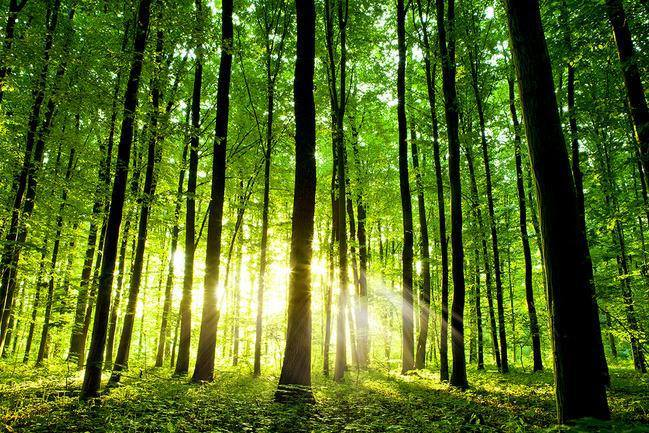

Una cosa que quizá hayas notado es que crecen muy cerca unos de otros y su densidad es particularmente alta. Gracias a su increíble altura (60-200 pies), troncos gruesos y raíces que se extienden a cientos de metros por debajo de la superficie, ¡son realmente fascinantes!

En este cuaderno, exploraremos los bosques más grandes del Universo, 'el bosque de Lyman-α', ¡que hace que las secuoyas parezcan pececillos! =)

En 1970, al observar detenidamente los espectros de cuásares muy distantes, el astrónomo Roger Lynds notó un gran número de 'líneas de absorción', caídas significativas en el espectro observado sin una explicación conocida.

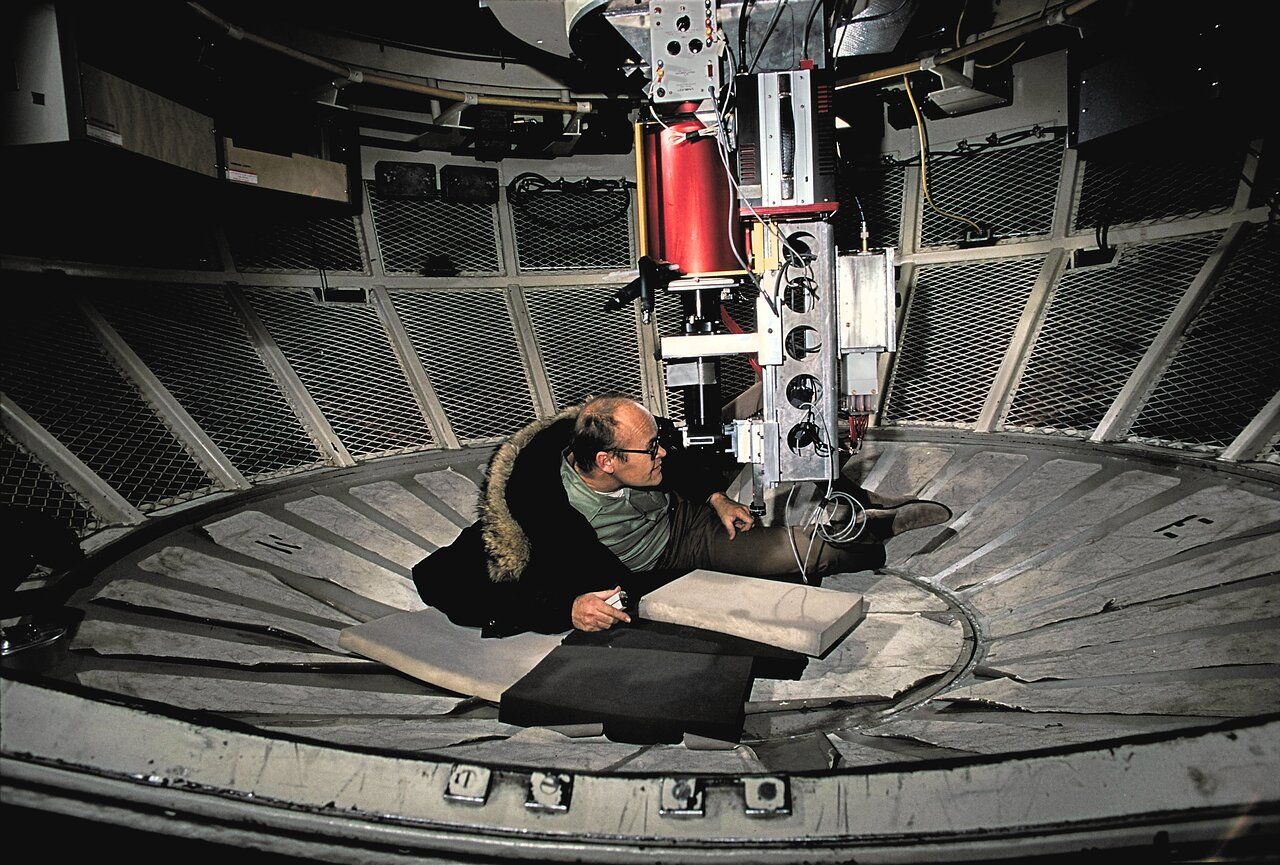

Crédito de la foto: NOIRLab/NSF/AURA

En particular, en el rango de longitud de onda entre Lyman-α (Lyα), a 121.6nm, y Lyman-β (Lyβ), a 102.6nm. Las dos primeras líneas de la serie de Lyman; recuerda, ¡vimos esto en el cuaderno de DESI!

Algunas líneas de absorción eran más anchas que otras y cubrían densamente el rango. A Lynds se le ocurrió que el conjunto de líneas de absorción se asemejaba a un bosque y, por lo tanto, ¡el nombre quedó fijado para siempre! ¿Pero qué había descubierto?

Los cuásares (a veces abreviados como QSOs) son galaxias que albergan un agujero negro supermasivo. La materia arrastrada por la inmensa atracción gravitacional del agujero negro forma un disco de acreción estrecho (¡quizás puedas imaginar por qué!) de tal manera que el gas circundante se calienta increíblemente y comienza a emitir una gran cantidad de radiación.

Impulsados por el agujero negro supermasivo, es posible observar QSOs a distancias realmente grandes debido a su luminosidad, o brillo intrínseco. La increíble fuerza de la gravedad alrededor de un agujero negro los obliga a ser los más compactos y densos conocidos y, como vemos luz solo de las regiones más calientes cerca del agujero negro, aparecen como puntos en las imágenes del cielo nocturno. ¡A menudo, los confundimos con estrellas a distancias mucho más cercanas!


In [5]:

def cutout(ax, ra, dec,scale=0.5):
  url       = f'https://www.legacysurvey.org/viewer/cutout.jpg?ra={ra}&dec={dec}&layer=dr8&pixscale={scale}'

  try:
    response  = requests.get(url, timeout=10.)
    img       = Image.open(BytesIO(response.content))
    ax.imshow(img)
  except:
    print('Failed to retrieve {}'.format(url))

  return  url

def tabl (data, n):
  df = pd.DataFrame(data[0:n])
  styled_df = df.style.set_table_styles(
    [{'selector': 'tr:hover', 'props': [('background-color', '#5F7255')]}]
  ).set_properties(**{'background-color': '#A3D389', 'color': 'black', 'border-color': '#5F7255'})
  display(styled_df)
  return styled_df

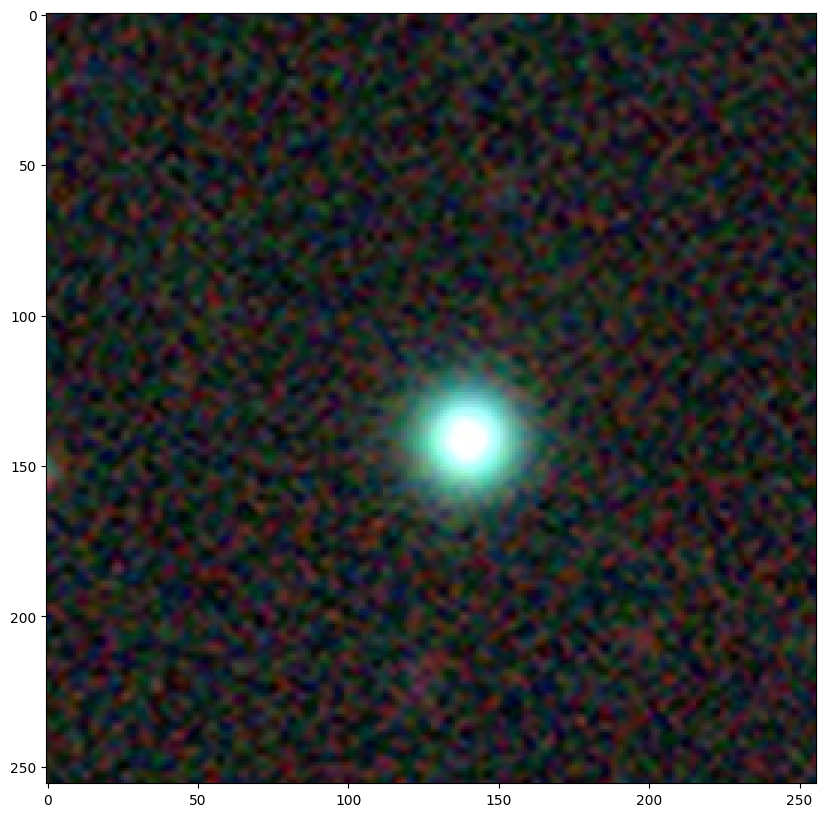

In [6]:
# A continuación obtenemos el url de la imagen del cielo, pasado los parámetros
# axes(este es el eje de la imágen), RA (La ascensión recta en grados, que indica
# la posición en el cielo en la dirección horizontal.), dec(la declinación
# en grádos, que indica la posición en el cielo en la dirección vertical.) y la escala
# en grados por pixel.
fig, axes  = plt.subplots(1, 1, figsize=(15., 10))
url        = cutout(axes,217.263,-1.755, scale=0.1)

Puedes viajar un poco por el cielo observando otras coordenadas (vea cuadernillo "Explorando la boveda celeste").




Pero, la física única de los cuásares distantes hace que su espectro sea muy distintivo. Contienen fuertes líneas de emisión, como la línea Lyα, y los más distantes contienen muchas más líneas de absorción que los más cercanos. ¡Pronto descubrirás por qué!

Estas absorciones pueden interpretarse como la misma transición Ly-α, pero observada a una longitud de onda más pequeña y, por lo tanto, a un corrimiento al rojo más bajo que el cuásar que emite la luz fuente (y la emisión de la línea Ly-α).

A medida que la luz del cuásar fuente viajaba hacia nosotros, fue 'corrida al rojo' por la expansión del Universo y se absorbió por la transición Ly-α en regiones densas de hidrógeno encontradas a lo largo de su camino. Como observadores, nos referimos a este camino como la línea de visión, que se muestra con más detalle en el video a continuación:

```python
YouTubeVideo('6Bn7Ka0Tjjw')
```

Las absorciones detectadas en los espectros de cuásares distantes pueden usarse como un rastreador directo de materia. El hidrógeno, al igual que la distribución de cuásares y galaxias, también rastrea la distribución de masa en el Universo.

Cuantas más nubes de hidrógeno haya en el Universo, más líneas de absorción observaremos. Además, hay más hidrógeno donde hay más materia oscura. ¡Así que detectar las absorciones Lyα nos permite inferir cómo se distribuye la materia en el Universo y cómo cambia esa distribución con el tiempo!

Al observar más de 700,000 cuásares distantes, los conjuntos de datos de DESI revolucionarán nuestros estudios del bosque de Lyα. Al identificar el bosque para cada uno de estos QSOs, también podemos medir con gran precisión qué tan rápido se ha expandido el Universo en puntos del pasado, buscando nuestro viejo amigo, el pico 'BAO'.

¡Sin más preámbulos, comencemos una exploración de los bosques de DESI!

Comenzaremos con los espectros DESI de la Publicación de Datos Tempranos, que es pública. Pronto, todos los datos tomados durante el año 1 de la encuesta DESI estarán disponibles para que los estudies.


In [7]:
TRGETID=[39627847626654815, 39633329401630516,39633329405821412,39633158395660371,39633329405823023,39627746095137037,39627581225438176]
inf = ['wavelength', 'flux', 'redshift', 'model','targetid']
spectra = client.retrieve_by_specid(TRGETID,
    include = inf)
spec = spectra.records

Si quieres comprender un poco más de como acceder a los datos y como estan estructurados, puedes ver el cuadernillo **Accesing Data**.

In [8]:
# Veamos en una tabla como estan estructurados los datos que acabamos de importar.
tabl(spec, 2);

,targetid,redshift,flux,wavelength,model,_dr
0,39627847626654815,4.651382,[-3.42747426 0.4465794 -1.69911122 ... 0.35515454 0.10741164 0.34907296],[3600. 3600.8 3601.6 ... 9822.4 9823.2 9824. ],[0.03572392 0.04743964 0.04822085 ... 0.19198348 0.180048 0.13486636],DESI-EDR
1,39633158395660371,2.934047,[-5.56676674 -1.32381082 4.03985357 ... 0.16854945 0.40327081 0.21963029],[3600. 3600.8 3601.6 ... 9822.4 9823.2 9824. ],[0.78952795 1.04358399 1.07204783 ... 0.37822381 0.35538515 0.24476299],DESI-EDR


También puedes ver los espectros utilizando el visor legacy, por ejemplo: https://www.legacysurvey.org/viewer/desi-spectrum/edr/targetid39627746095137037

Excelente ya tenemos los datos de los espectros cargados en nuestro código, ahora veamos como se ven los espectros en una gráfica.

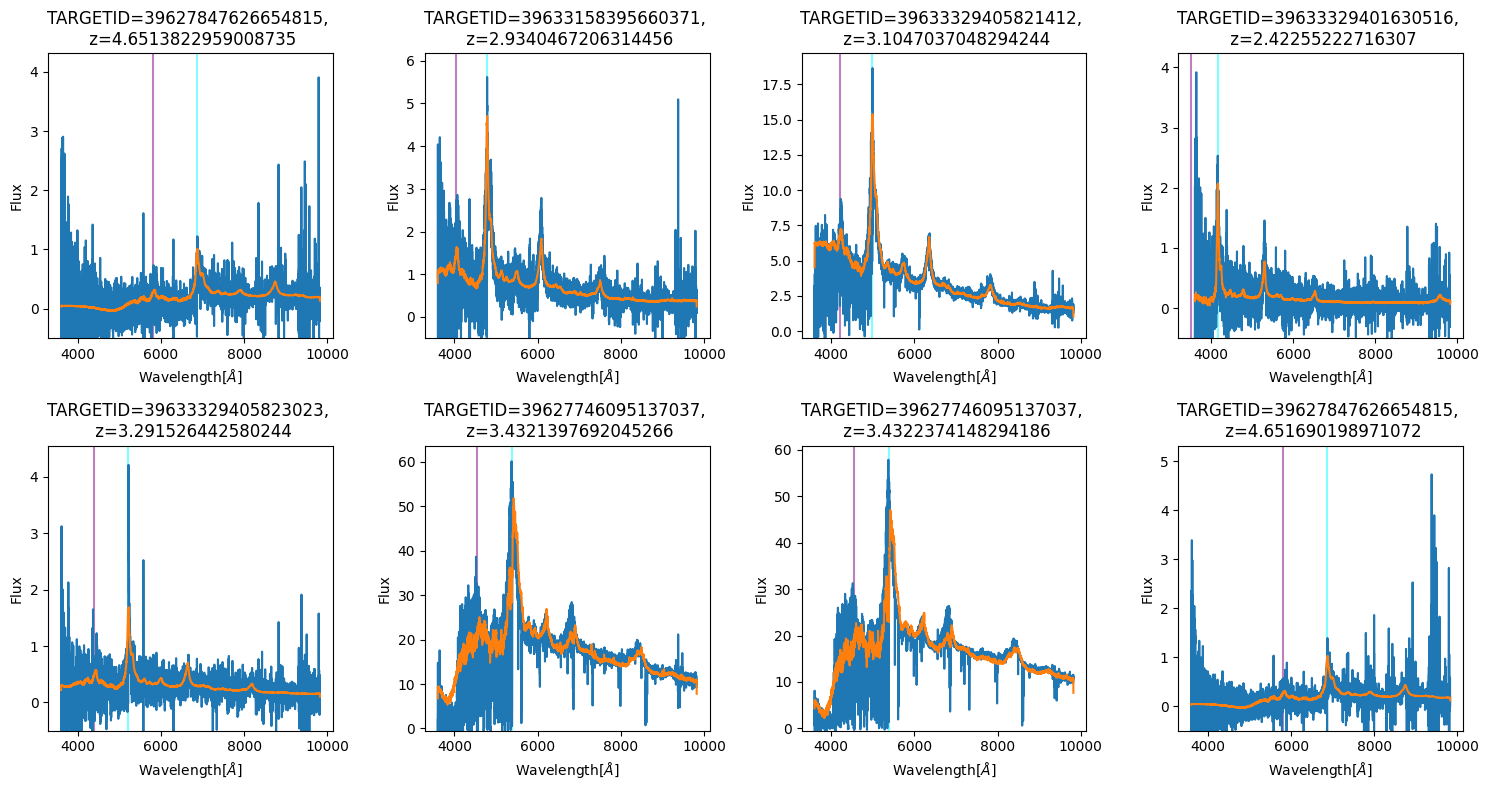

In [9]:
Lya = 1215.67
Lyb = 1026.0

fig, axs = plt.subplots(2,4, figsize=(15,8))
axs = axs.flatten()

for i, _spec in enumerate(spec):
    ax = axs[i]
    ax.axvline((1. + _spec.redshift) * Lya, c='cyan', alpha=0.5)
    ax.axvline((1. + _spec.redshift) * Lyb, c='purple', alpha=0.5)
    ax.plot(_spec.wavelength, _spec.flux)
    ax.plot(_spec.wavelength, _spec.model)
    ax.set_title(f"TARGETID={_spec.targetid}, \n z={_spec.redshift}")
    ax.set_ylim(bottom=-0.5)
    ax.set_ylabel('Flux')
    ax.set_xlabel('Wavelength[$\AA$]')

plt.tight_layout()
plt.show()

Parece que la línea de emisión Lyα es visible para todos los cuásares. Parece que hay algunas líneas de absorción presentes, pero la línea de emisión Lyβ solo es visible para algunos de estos. ¡Todos estos cuásares tienen un corrimiento al rojo por encima de 2.1, por lo que cumplen la condición para observar un bosque en los cuásares DESI!

Veamos con más detalle trazándolos nuevamente, pero ahora resaltando la región entre la región entre Lyα y Lyβ.


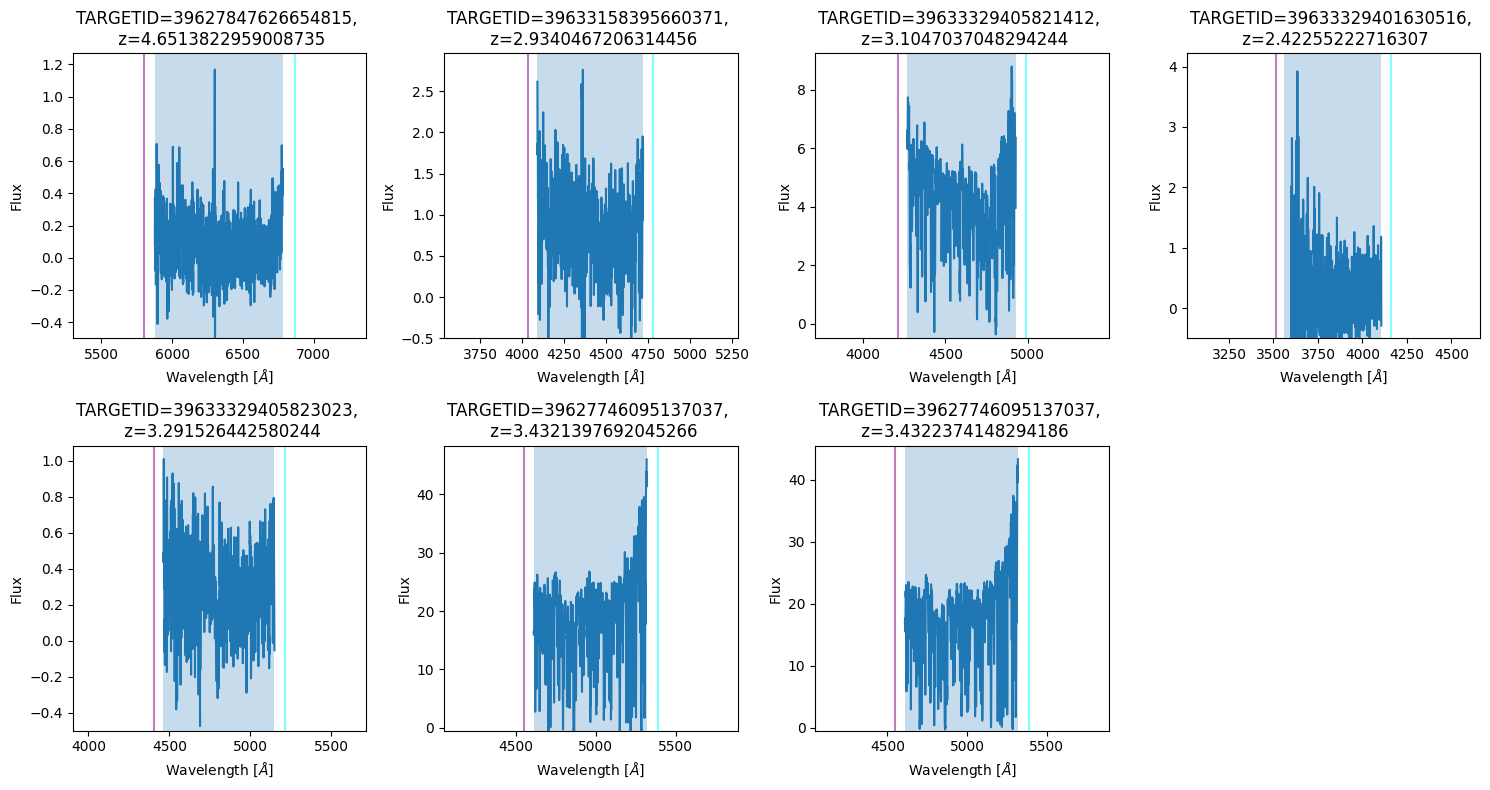

In [10]:
# Definimos el rango de la longitud de onda del bosque de Lya.
lambda_min = 1040
lambda_max = 1200

fig, axs = plt.subplots(2,4, figsize = (15,8))
axs = axs.flatten()

for i, _spec in enumerate(spec[:-1]):
  ax = axs[i]
  tmp = _spec.wavelength.copy()
  mask = (_spec.wavelength >= (1. +_spec.redshift) *  lambda_min) & (_spec.wavelength<(1. + _spec.redshift) * lambda_max)
  tmp[~mask]=np.nan
  _spec.wavelength=tmp

  ax.axvline((1. + _spec.redshift) * Lya, c='cyan', alpha=0.5)
  ax.axvline((1. + _spec.redshift) * Lyb, c='purple', alpha=0.5)
  ax.axvspan((1. + _spec.redshift) * lambda_min,(1. + _spec.redshift) * lambda_max,alpha=0.25)
  ax.plot(_spec.wavelength[mask], _spec.flux[mask])
  ax.set_xlim((1. + _spec.redshift) * Lyb-500,(1. + _spec.redshift) * Lya+500)

  ax.set_title(f"TARGETID={_spec.targetid}, \n z={_spec.redshift}")
  ax.set_ylim(bottom=-0.5)
  ax.set_ylabel('Flux')
  ax.set_xlabel('Wavelength [$\AA$]')

for j in range(7, 8):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()



¡Sí! Definitivamente hay algunas absorciones, como se muestra en la región sombreada con el bosque de Lyman-alpha.

Tal vez te estés preguntando, ¿cómo sabemos que esas son realmente líneas de absorción y no el mismo ruido que vemos en otras partes del espectro?

Bueno, es por eso que necesitamos espectros de alta calidad para los estudios del bosque. Cuanto más tiempo nuestro telescopio capture la luz, más fotones recibiremos y menos ruido tendremos en el espectro, lo que permitirá que las absorciones reales se hagan evidentes.

https://github.com/DESIHIGH/desihigh/blob/main/desihigh/images/lya_desihigh.gif lyaforest

¿Notas la gran absorción en ~4500 Ångstrom en algunos espectros? Es muy probable que corresponda a lo que se llama un \Absorbedor de Lyman-alpha Amortiguado' (DLA, por sus siglas en inglés), que es producido por una región de Hidrógeno de densidad particularmente alta. En realidad algunos espectros tienen esta absorción en otros Ångstroms debido al corrimiento al rojo al que se encuentran.

Podríamos dedicar un estudio completo a este tipo especial de absorción, pero para el propósito de usar el bosque en la cosmología, estas líneas más gruesas son difíciles de interpretar y usualmente las eliminamos del bosque.



Al igual que los DLAs, hay otros tipos de absorciones que no corresponden realmente a las de Lyman-alpha que buscamos, por lo que tenemos que dedicar algo de tiempo a entender e identificar cuáles absorciones son útiles y cuáles no, y tratar de eliminarlas o modelarlas... ¡pero, por suerte, no lo hacemos a simple vista!

¿Se te ocurre una manera rápida y fácil de identificar DLAs?

Bueno, mientras diseñas un método para ayudarnos, vamos a simplificar las cosas y extraer el bosque sin importar los contaminantes que puedan estar presentes.

Para esto, necesitamos seleccionar solo el rango de longitudes de onda que se encuentra entre las regiones de Lyman-alpha y Lyman-beta como la maskara que hicimos anteriormente.

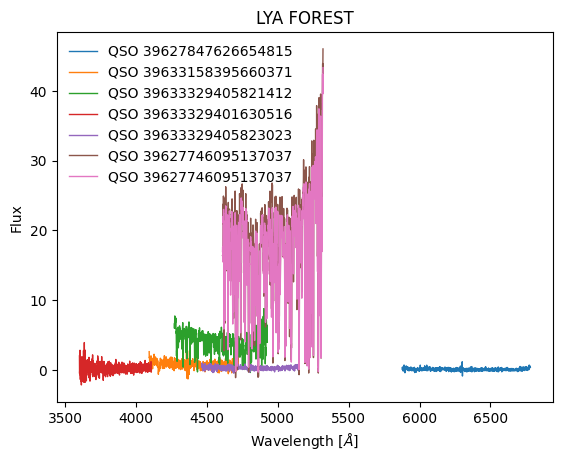

In [11]:
for _spec in spec[:-1]:
    plt.plot(_spec.wavelength, _spec.flux, lw=1, label=f'QSO {_spec.targetid}')
    plt.title("LYA FOREST")
    plt.ylabel('Flux')
    plt.xlabel(r'Wavelength [$\AA$]')

plt.legend(frameon=False)
plt.savefig('lya_forest.png')

¡HECHO! ¡Hemos encontrado los bosques! ¿Qué sigue?

Podemos ver que hay regiones en los espectros donde parece que hay más o menos absorción que el promedio. Esto se debe a que había más o menos hidrógeno (es decir, más o menos materia) que el promedio. Tenemos un sobreflujo y un subflujo con respecto al nivel medio. Esto es lo que usualmente llamamos el "campo de transmisión de flujo", también conocido como "deltas", que se puede calcular para cada cuásar con la siguiente ecuación:


$1 + δ_q(λ) = \frac{f_q(λ)}{F̄(λ)C_q(λ)}$

donde es el flujo observado para cada cuásar y $F̄(λ)C_q(λ)$  es nuestra estimación del flujo transmitido promedio que veríamos si la absorción de Ly fuera la misma en todas partes, es decir, una densidad constante de hidrógeno.


representa el continuo no absorbido del cuásar, el flujo que habríamos observado si no hubiera hidrógeno absorbiendo la luz a lo largo de la línea de visión. No es fácil determinar esto a partir de los espectros de cuásares sin conocer la transmisión promedio.

¡Pero no todo está perdido! Un científico inteligente (¿quién, te preguntarás?) se dio cuenta de que podemos modelar el flujo transmitido promedio con una línea recta en , de la siguiente manera:

$F̄(λ)C_q(λ) = C̃(λ_{RF})(a_q + b_q log λ)$


donde $C̃(λ_{RF})$ ahora es el continuo promedio, el promedio de todos los continuos de cuásares, en el marco de reposo, que debemos determinar.

Aquí surge otra aproximación, pensemos por un momento que $C̃(λ_{RF}) = 1$. en este caso solo nos queda determinar el $a_q$ y $b_q$ para cada cuásar, lo que podemos hacer ajustando una línea recta al flujo en la región del bosque.

¡Si seguimos este camino, podemos tener una primera aproximación de las "deltas"!

*Si quieres entender un poco mas de donde vienen estas funciones puedes consultar el cuadernillo "Las matematicas en la cosmología"*

In [12]:
# Crearemos algunas funciones que nos permitan encontrar los parámetros que
# mejor describen los datos observados ajustándolos a un modelo teórico.
def chisq(model_params, model, data):
    model_data = model(model_params) #Calcula los datos predichos por el modelo dado un conjunto de parámetros.
    chi = (data - model_data) ** 2
    return np.sum(chi[~np.isnan(chi)])


# Encontramos los valores óptimos de los parámetros libres del modelo (model_params) que
# minimizan la función chi-cuadrado.
# Es decir, encontrar los parámetros que mejor ajustan el modelo a los datos espectrales.

def fit_spectra(model, spectra):
    results = op.minimize(chisq, [0, 0], args=(model, spectra))
    return results.x # los mejores ajustes para el modelo dado.



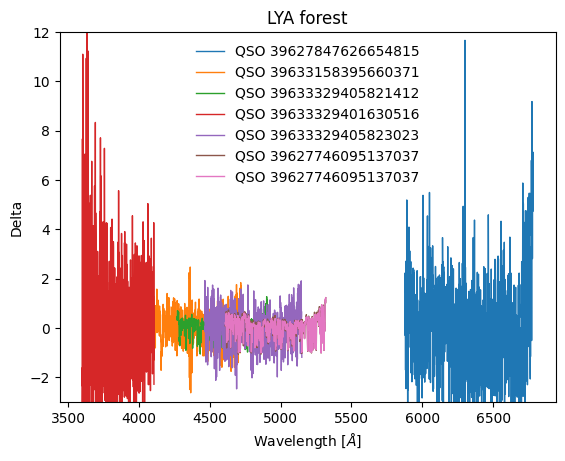

In [13]:
for _spec in spec[:-1]:
    redshift = _spec.redshift
    plt.title("LYA forest")

    meanC=1
    model = lambda model_params: meanC*model_params[0] + model_params[1]*np.log10(_spec.wavelength)
    a_q,b_q = fit_spectra(model,_spec.flux) # Ajustamos el modelo teórico a los datosde flujo espectral.
                                # Esto devuelbe los mejores parametros para a_q y b_q que minimizan la diferencia
                                #entre el modelo y los datos.
    # Hagamos uso de los parámetros obtenidos:
    best_model = model([a_q,b_q])
    nans= np.isnan(_spec.flux)
    plt.plot(_spec.wavelength[~nans], _spec.flux[~nans]/best_model[~nans]-1, lw=1, label=f'QSO {_spec.targetid}')

    plt.ylim(bottom=-1)
    plt.ylabel('Delta')
    plt.xlabel(r'Wavelength [$\AA$]')


plt.ylim(-3,12)
plt.legend(frameon=False)
plt.plot()
plt.savefig('lya_forest_op.png')

Este gráfico es una representación de la desviación del flujo observado con respecto a lo que se espera de un modelo de flujo continuo. Valores de "Delta" mayores o menores que cero indican que el flujo observado es, respectivamente, mayor o menor que el modelo esperado. Las fluctuaciones en estas curvas pueden indicar la presencia de nubes de hidrógeno o variaciones en la densidad del gas a lo largo de la línea de visión hacia los cuásares.

¿Se te ocurre una mejor forma de estimar las "deltas"?, es momento de ponernos a pensar y que pongas a prueba tus nuevas ideas!.

Una vez obtenidas las deltas y que estemos conforme con su estimación, es momento de ponernos a analizar con ellas que tan rápido se esta expandiendo el universo, pero no te preocupes que eso lo dejamos para otro día.


Ahora intenta analizar por tu cuenta diferentes espectros, te invito a revisar el cuadernillo **Accessing Data** donde explicamos mas a detalle la estructura y acceso a los datos proporcionados por DESI.